<a href="https://colab.research.google.com/github/hyung6370/AlbumsOfASH/blob/main/P11_Mnist_CNN_Keras_transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [362]:
# import tensorflow as tf
# from tensorflow import keras
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime      # datetime.now() 를 이용하여 학습 경과 시간 측정

In [363]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [364]:
# 시퀀스 모델
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', strides=1, input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', strides=1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(4, 4), activation='relu', padding='same', strides=1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', strides=1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same', strides=1))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

# 출력 Feature Map 하나의 shape -> 3차원 (h, w, c)
# 3차원 -> 1차원
model.add(Flatten())
# model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

############  Try to change the NN structure and parameters #####################

# model = Sequential()

# model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(32, kernel_size=(4, 4), activation='relu', padding='same'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
####################################################################################



model.summary()

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_192 (Conv2D)         (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_189 (MaxPooli  (None, 14, 14, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_193 (Conv2D)         (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_190 (MaxPooli  (None, 7, 7, 32)         0         
 ng2D)                                                           
                                                                 
 conv2d_194 (Conv2D)         (None, 7, 7, 64)          32832     
                                                                 
 max_pooling2d_191 (MaxPooli  (None, 3, 3, 64)       

In [365]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
start_time = datetime.now()

hist = model.fit(x_train, y_train,
                 batch_size=128, epochs=20, verbose=1, 
                 validation_data=(x_test, y_test))
print("\nTraining time = ", datetime.now() - start_time) 

Epoch 1/20
469/469 [==============================] - 4s 7ms/step - loss: 0.3372 - accuracy: 0.8928 - val_loss: 0.1000 - val_accuracy: 0.9685
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0774 - accuracy: 0.9761 - val_loss: 0.0459 - val_accuracy: 0.9846
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0517 - accuracy: 0.9839 - val_loss: 0.0435 - val_accuracy: 0.9853
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0388 - accuracy: 0.9877 - val_loss: 0.0398 - val_accuracy: 0.9857
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0319 - accuracy: 0.9898 - val_loss: 0.0309 - val_accuracy: 0.9897
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0261 - accuracy: 0.9914 - val_loss: 0.0287 - val_accuracy: 0.9905
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0215 - accuracy: 0.9930 - val_loss: 0.0351 - val_accuracy: 0.9893
Epoch 

In [366]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='Train loss')
  plt.plot(history.history['val_loss'], label='Validation loss')
  plt.title('Loss')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend()
  plt.show()

In [367]:
def plot_accuracy(history):
  plt.plot(history.history['accuracy'], label='Train accuracy')
  plt.plot(history.history['val_accuracy'], label='Validation accuracy')
  plt.title('Answer')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.show()

Test loss: 0.03678777441382408


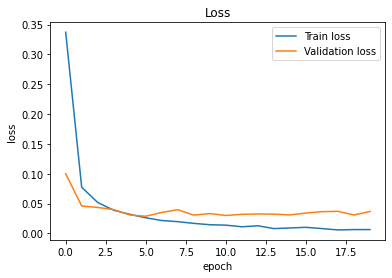


Test accuracy: 0.9914000034332275


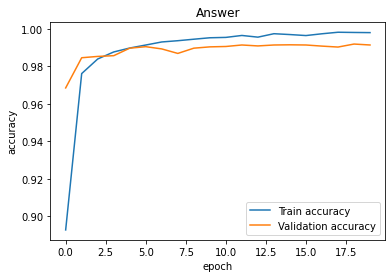

In [368]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
plot_loss(hist)
print()
print('Test accuracy:', score[1])
plot_accuracy(hist)

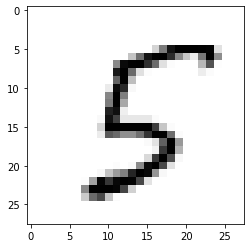

The Answer is  5


In [369]:
t = 23    # t번째 테스트 이미지
plt.imshow(x_test[t].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

print('The Answer is ', np.argmax(model.predict(x_test[t:t+1])))

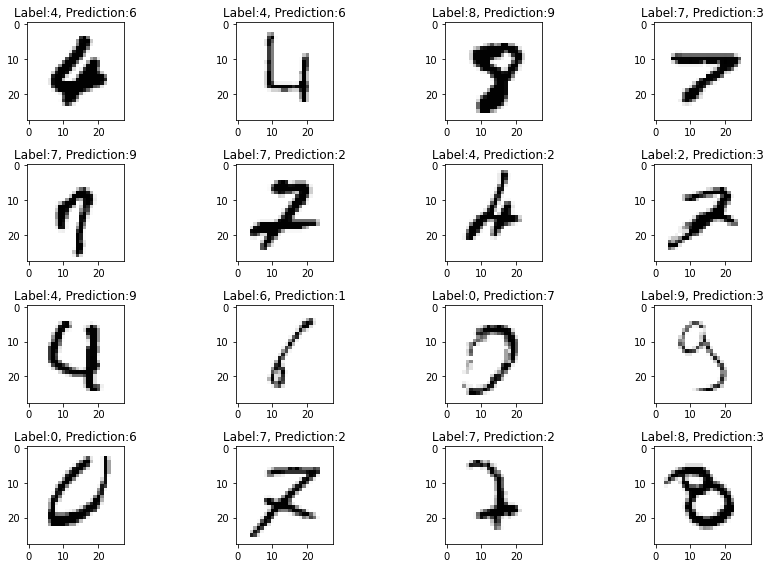

In [370]:
predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result, axis=1)
test_labels = np.argmax(y_test, axis=1)

wrong_result = []
for n in range(0, len(test_labels)):
    if predicted_labels[n] != test_labels[n]:
        wrong_result.append(n)

samples = np.random.choice(wrong_result, 16,  replace=False)

count = 0
nrows = ncols = 4

plt.figure(figsize=(12,8))

for n in samples:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    tmp = "Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n])
    plt.title(tmp)

plt.tight_layout()
plt.show()